<a href="https://colab.research.google.com/github/sudipto291088/Projects/blob/main/Predicting_Sales_from_Advertising_Budget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"

df = pd.read_csv(url, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.dtypes

,0
TV,float64
radio,float64
newspaper,float64
sales,float64


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.shape

(200, 4)

In [11]:
df.isnull()

,TV,radio,newspaper,sales
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False
199,False,False,False,False


In [12]:
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


In [13]:
df.isnull().sum().sum()

np.int64(0)

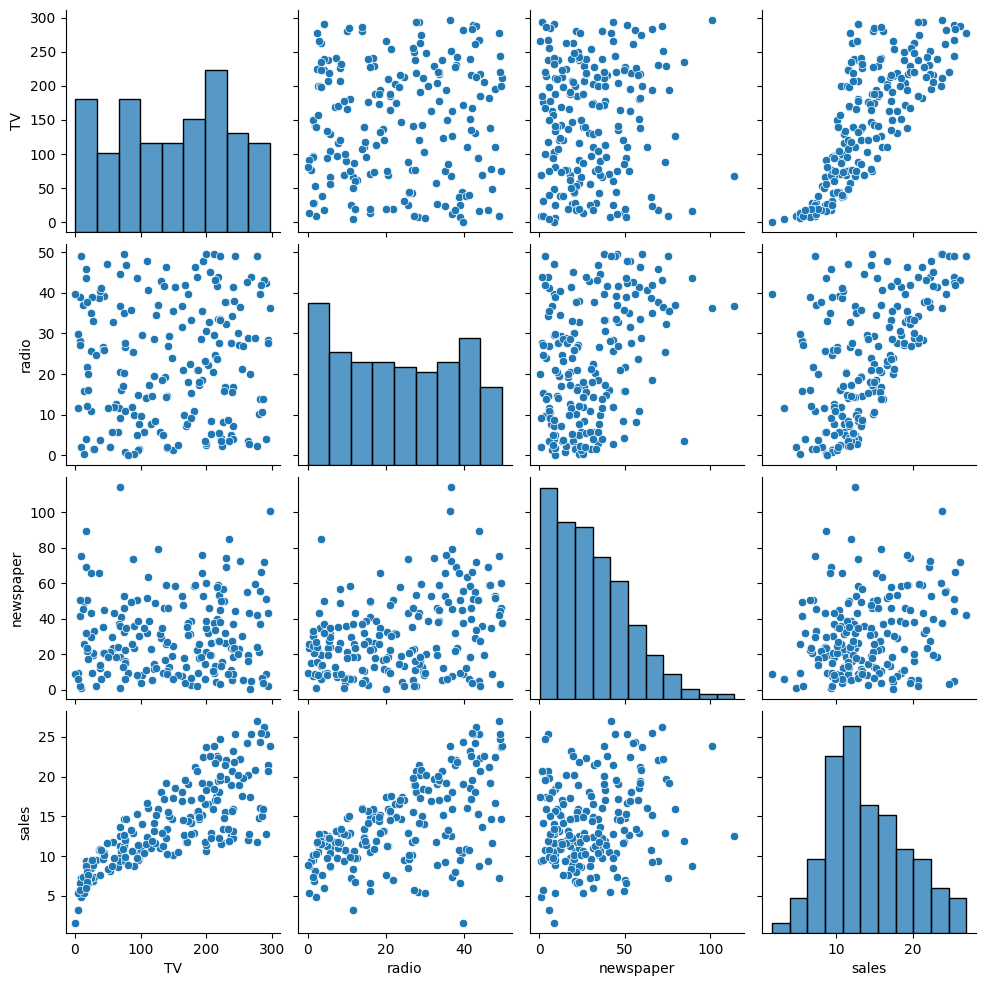

In [15]:
sns.pairplot(df)

# Hence as per the above observation, more the money spent on TV ads more the sales.

In [16]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [17]:
## Feature Selection / Train and Test Split

X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X.shape

(200, 3)

In [21]:
X_train.shape

(160, 3)

In [22]:
X_test.shape

(40, 3)

# Model Training

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
print("Coefficients: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficients:  [0.04472952 0.18919505 0.00276111]
Intercept:  2.979067338122629


# Model and Prediction

In [26]:
y_pred = model.predict(X_test)

In [27]:
len(y_pred)

40

In [28]:
len(y_test)

40

In [35]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': np.abs(df1.Actual - df1.Predicted)})
df1.head(15)

,Actual,Predicted,Error
96,16.9,16.408024,0.491976
16,22.4,20.889882,1.510118
31,21.4,21.553843,0.153843
159,7.3,10.608503,3.308503
129,24.7,22.112373,2.587627
116,12.6,13.105592,0.505592
70,22.3,21.057192,1.242808
171,8.4,7.461010,0.938990
175,11.5,13.606346,2.106346
46,14.9,15.155070,0.255070


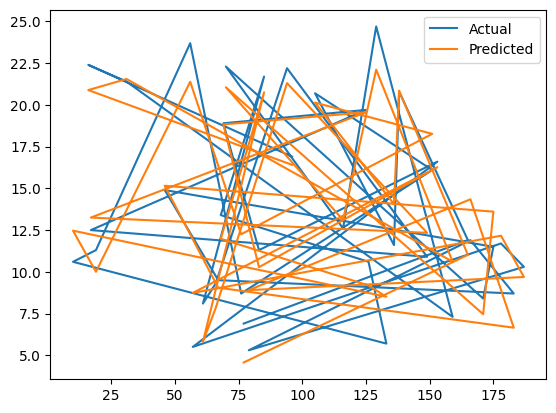

In [37]:
plt.plot(df1['Actual'], label='Actual')
#plt.plot(df1['Error'], label='Error')
plt.plot(df1['Predicted'], label='Predicted')
plt.legend()
plt.show()

<Axes: >

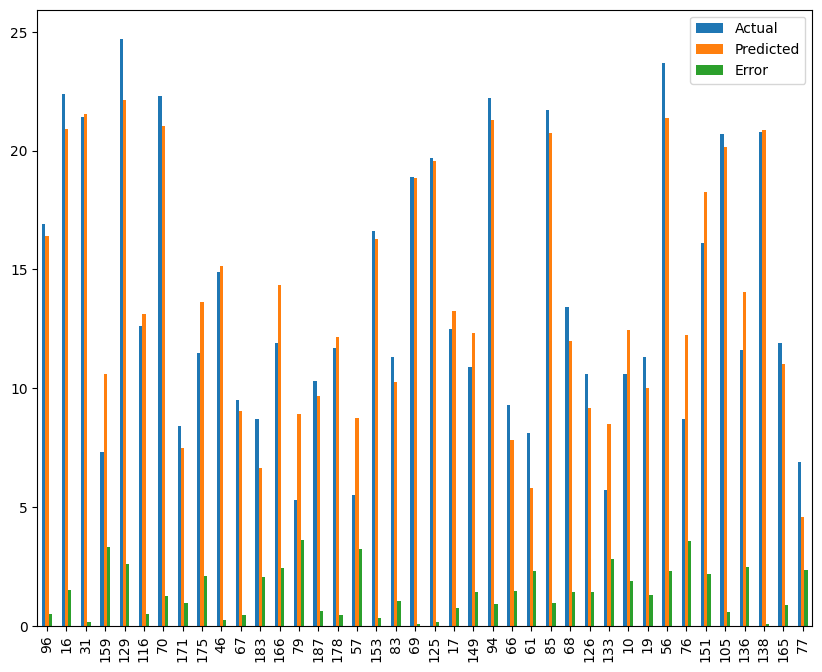

In [45]:
df1.plot(kind='bar', figsize=(10,8))

<Axes: >

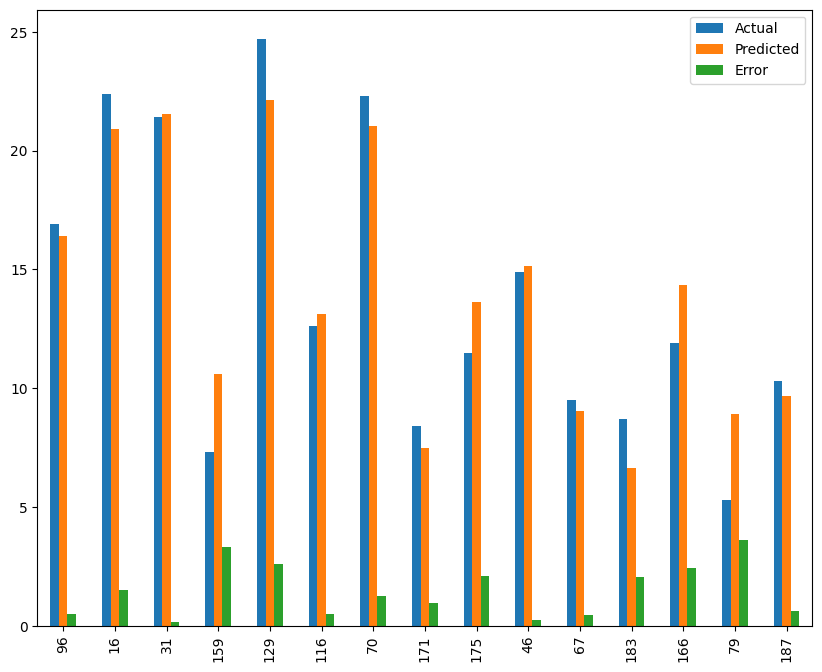

In [46]:
df1.head(15).plot(kind='bar', figsize=(10,8))

In [52]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 3.1740973539761033
R2 Score: 0.899438024100912
Root Mean Squared Error: 1.78159966153345
Mean Absolute Error: 1.4607567168117603


**The MSE tells us how far off our predictions are (lower is better).**




**The R² score shows how well the model explains variation in sales (closer to 1 = better fit).**

| Metric                             | Value | Interpretation                                                                                                 |
| ---------------------------------- | ----- | -------------------------------------------------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**      | 1.46  | On average, your predictions are off by about **1.46 sales units**.                                            |
| **MSE (Mean Squared Error)**       | 3.17  | Average of squared errors — lower is better. Squaring penalizes large errors more.                             |
| **RMSE (Root Mean Squared Error)** | 1.78  | Average prediction error is **~1.78 sales units**, in the same units as sales.                                 |
| **R² Score**                       | 0.899 | Your model explains **about 89.9%** of the variation in sales — that’s *very strong* for a real-world dataset. |


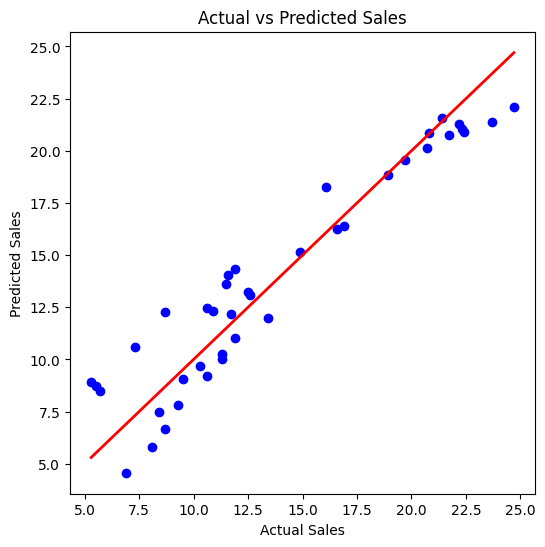

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [55]:
X_test.shape

(40, 3)

In [56]:
y_pred.shape

(40,)

In [59]:
y_test.shape

(40,)

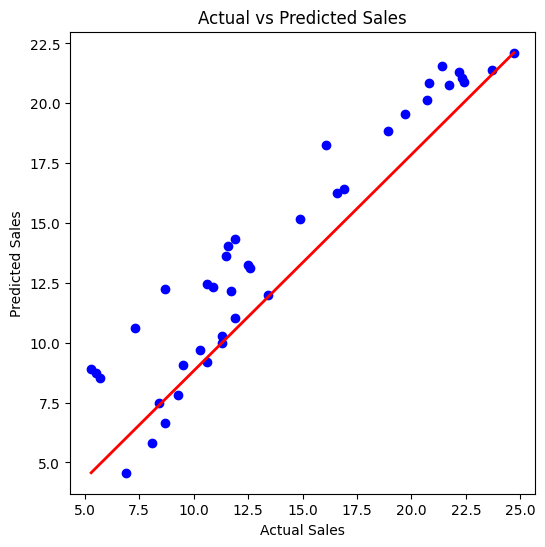

In [61]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

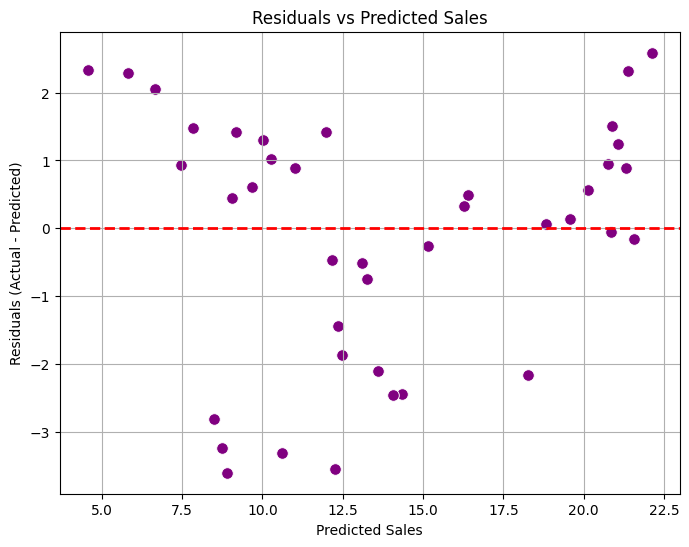

In [64]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', s=70)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # reference line at 0
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Sales")
plt.grid(True)
plt.show()


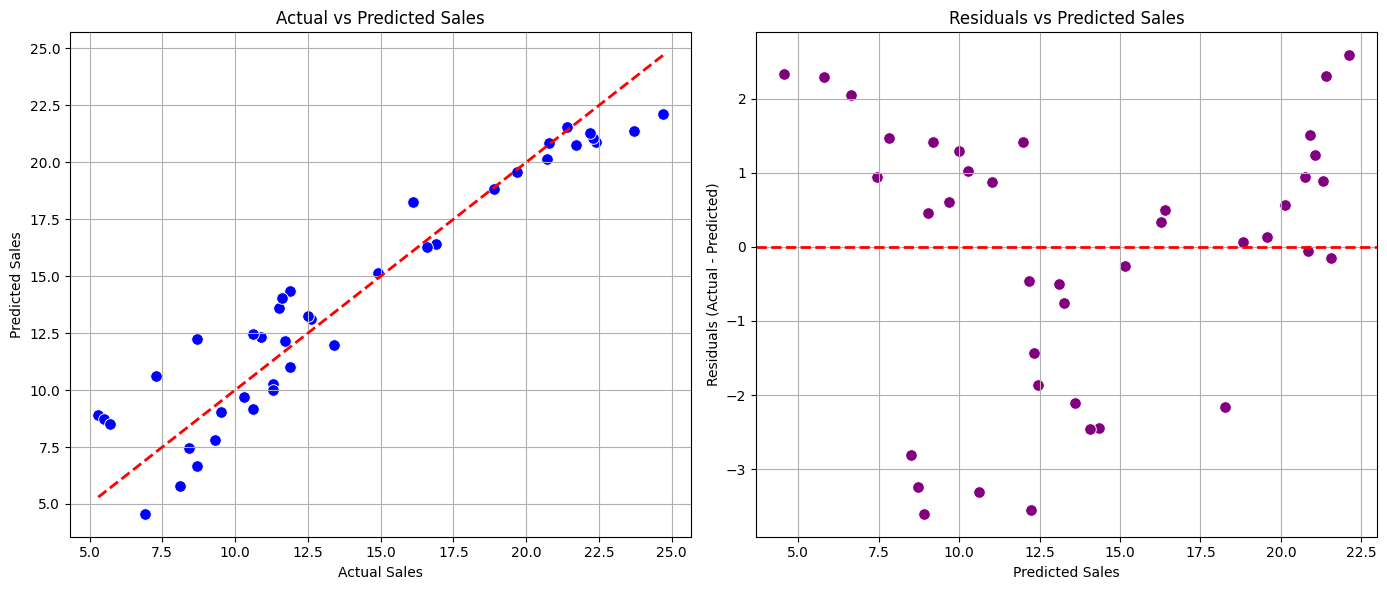

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Plot 1: Predicted vs Actual
sns.scatterplot(ax=axes[0], x=y_test, y=y_pred, color='blue', s=70)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Actual Sales")
axes[0].set_ylabel("Predicted Sales")
axes[0].set_title("Actual vs Predicted Sales")
axes[0].grid(True)

# Plot 2: Residuals
residuals = y_test - y_pred
sns.scatterplot(ax=axes[1], x=y_pred, y=residuals, color='purple', s=70)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel("Predicted Sales")
axes[1].set_ylabel("Residuals (Actual - Predicted)")
axes[1].set_title("Residuals vs Predicted Sales")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [66]:
# Find the most impactful feature
features = ['TV', 'Radio', 'Newspaper']
coefficients = model.coef_
impact = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
impact = impact.sort_values(by='Coefficient', ascending=False)
impact


,Feature,Coefficient
1,Radio,0.189195
0,TV,0.044730
2,Newspaper,0.002761


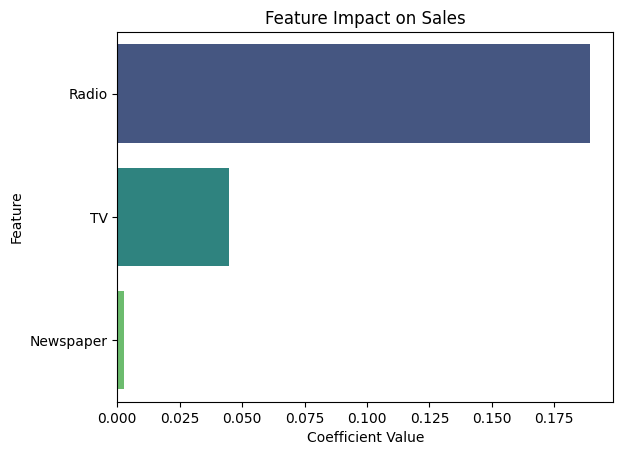

In [67]:
sns.barplot(x='Coefficient', y='Feature', data=impact, palette='viridis')
plt.title("Feature Impact on Sales")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()
